# Plot for learning curve

In [3]:
import numpy as np
import matplotlib.pylab as plt
import glob
import MDAnalysis
import sys
import matplotlib.lines as mlines
mev_to_kj=96.485307/1000.


SMALL_SIZE = 7
MEDIUM_SIZE = 9
BIGGER_SIZE = 10

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title,'#ffff33'
colors=['#377eb8','#4daf4a','#e41a1c','#984ea3','#ff7f00','#a65628','#f781bf','#999999']*3

In [4]:
data=np.loadtxt('lcurve.out')
data[:,1:]=np.loadtxt('lcurve.out')[:,1:]*1000
data[:,0]=data[:,0]/1E6

In [5]:
N=200
def moving_average(a, n=N) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

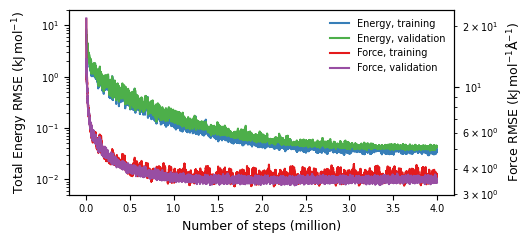

In [11]:
fig, ax1 = plt.subplots(figsize=(5.4, 2.5))
ax2 = ax1.twinx()

ln1=ax1.plot(data[:-N+1,0], moving_average(data[:,4])*mev_to_kj
,color=colors[0],label='Energy, training')
ln2=ax1.plot(data[:-N+1,0], moving_average(data[:,3])*mev_to_kj
,color=colors[1],label='Energy, validation')

ln3=ax2.plot(data[:-N+1,0], moving_average(data[:,6])*mev_to_kj
,color=colors[2],label='Force, training')
ln4=ax2.plot(data[:-N+1,0], moving_average(data[:,5])*mev_to_kj
,color=colors[3],label='Force, validation')

lns = ln1+ln2+ln3+ln4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0,frameon=False)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Number of steps (million)')
ax1.set_ylabel('Total Energy RMSE (kJ$\,$mol$^{-1}$)')
ax2.set_ylabel('Force RMSE (kJ$\,$mol$^{-1}$Å$^{-1}$)')
ax1.set_ylim([0.005,20])


!rm -rf figs
!mkdir figs
plt.tight_layout()
plt.savefig('figs/LearningCurve.png',dpi=300)
plt.savefig('figs/LearningCurve.pdf')